# Student Performance Indicator Regression Problems.

##  Project Management Methodology

###  CRISP-ML(Q) - Cross Industry Standard Process for Machine Learning with Quality Assurance.

#### 1a. Business Understanding.
#### 1b. Data Understanding.
#### 2.  Data Preparation.
#### 3.  Model Building.
#### 4.  Evaluation.
#### 5.  Model Deployment.
#### 6. Monitoring and Maintenance.

# 1)Problem Statement:-

### . This project regarding to how student perfomance can we predict using the variables like Gender, Ethnicity, Parental level of education , Test preparation scores etc.  

# 2) Data Extraction /Collection.

## > Data source-https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

## > This data sets consists of 8 column and 1000 rows  with numerical  and  categorical. 

# 2.1  Libraries or Packages .

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import CSV file:

In [26]:
df = pd.read_csv(r'E:\Performance_of_student\src\notebook\Data\stud.csv')


## 2.2  DataSet Information

Tops 10 records:

In [27]:
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


Shape of the Dataset:

In [28]:
df.shape

(1000, 8)

There are 1000 rows and 8 columns

## Some information related to the columns

### 1)Gender : Sexuality of student (Male / Female)
### 2)Ethnicity : Which classes they are belongs (Group A, B, C, D, E)
### 3)Parental level of education : Parent's education (bachelor'degree,some college,master's degree, associate's degree, high school)
### 4)Lunch : haded lunch before the test (Standard or free/reduced)
### 5)Test preparation course : Complete or not complete before test.
### 6)Math Score.
### 7)Reading Score.
### 8)Writing Score.

##  3. Data checks

> Missing values

> Duplicates

> Data type

> no of unique values in a column

> Stats of dataset

> Different categories

## 3.1 check Missing values.

In [29]:
df.isnull().sum()    # df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no missing values in the dataset.

## 3.2 check duplicates

In [30]:
df.duplicated().sum()

0

No duplicates found.

## 3.3 Check data types

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In data sets there are 5 columns are object datatype and remaining 3 are numerical datatype.

## 3.4 Check no of uniques values in each column

In [32]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## 3.5 check stats of the dataset

In [33]:
# only for numerical columns.
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


1) From above stats we can clearly observe maen of all the scores lying between 66 and 69.
2) All standard deviation are close between 14.6 to 15.19 .
3) For all scores are almost same in the terms of 25% , 50% and 75% quantiles.

In [34]:
# We can perform stats for categorical columns also.
df.describe(include='object')

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


1) In gender feature 2 unique and female gender high in number with almost 518 times occures.
2) Ethnicity -> 5 unique -> group c in top -> with 319 freq.
3) Parental level education -> 6 unique -> some college in top -> 226 freq.

## 3.6 check categories in each columns.

In [35]:
df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74


In [36]:
for i in df.columns[:5]:
    print("Categories in",i,"variable:         ",end=" ")
    print(df[i].unique())
    print()

Categories in gender variable:          ['female' 'male']

Categories in race_ethnicity variable:          ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in parental_level_of_education variable:          ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in lunch variable:          ['standard' 'free/reduced']

Categories in test_preparation_course variable:          ['none' 'completed']



In [37]:
# segregate numerical and categorical columns.
numerical_columns=[col for col in df.columns if df[col].dtype !='O']

categorical_columns=[cal for cal in df.columns if df[cal].dtype =='O']

In [38]:
print('we have {} numerical features : {}'.format(len(numerical_columns),numerical_columns))
print()
print('we have {} categorical features : {}'.format(len(categorical_columns),categorical_columns))

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## Added  columns of "Total_Score" and  "Average"


In [39]:
df.head(1)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74


In [41]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=round(df['total_score']/3,2)

In [ ]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [42]:
math_full_score=df[df['math_score']==100]['average'].count()
write_full_score=df[df['writing_score']==100]['average'].count()
read_full_score=df[df['reading_score']==100]['average'].count()

print(f'Number of students with full marks in math_score:{math_full_score}')
print(f'Number of students with full marks in writing_score:{write_full_score}')
print(f'Number of students with full marks in reading_score:{read_full_score}')

Number of students with full marks in math_score:7
Number of students with full marks in writing_score:14
Number of students with full marks in reading_score:17


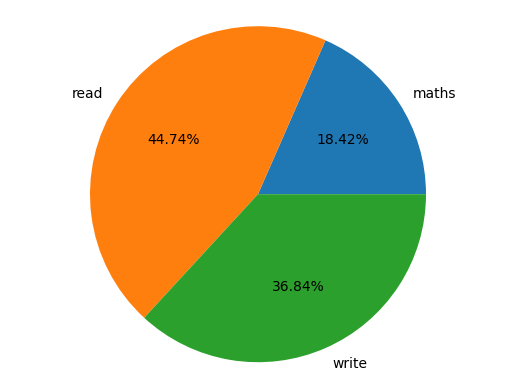

In [43]:
plt.pie(x=[math_full_score,read_full_score,write_full_score],labels=['maths','read','write'],autopct='%.2f%%')
plt.axis('equal')
plt.show()

In [44]:
maths_fail_marks=df[df['math_score']<35]['average'].count()
read_fail_marks=df[df['reading_score']<35]['average'].count()
write_fail_marks=df[df['writing_score']<35]['average'].count()

In [45]:
print(f'No of students less than 35 marks in maths:{maths_fail_marks}')
print(f'No of students less tha 35 marks in reading:{read_fail_marks}')
print(f'No of students less than 35 marks in writing:{write_fail_marks}')

No of students less than 35 marks in maths:22
No of students less tha 35 marks in reading:15
No of students less than 35 marks in writing:17


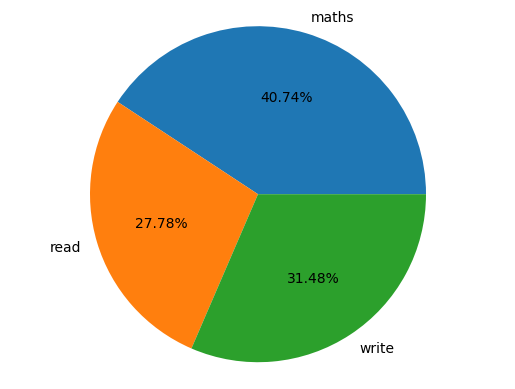

In [46]:
plt.pie(x=[maths_fail_marks,read_fail_marks,write_fail_marks],labels=['maths','read','write'],autopct='%1.2f%%')
plt.axis('equal')
plt.show()

## 4) Exploring Data Analysis(Using Visualization)

## 4.1 Histogram and KDE

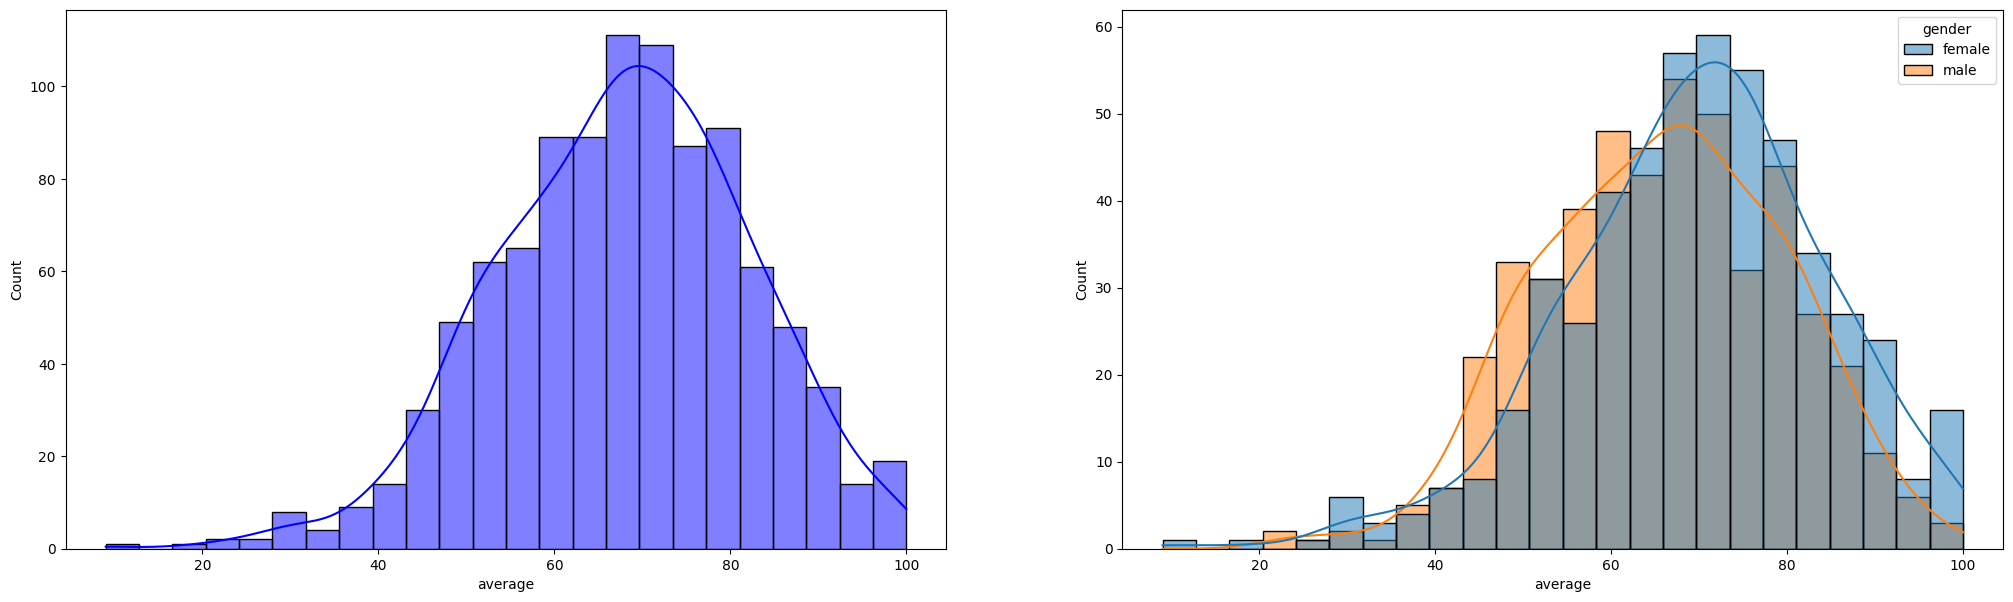

In [47]:
fig,axe=plt.subplots(1,2,figsize=(25,7))
plt.subplot(121)
sns.histplot(data=df,x='average',kde=True,color='b')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

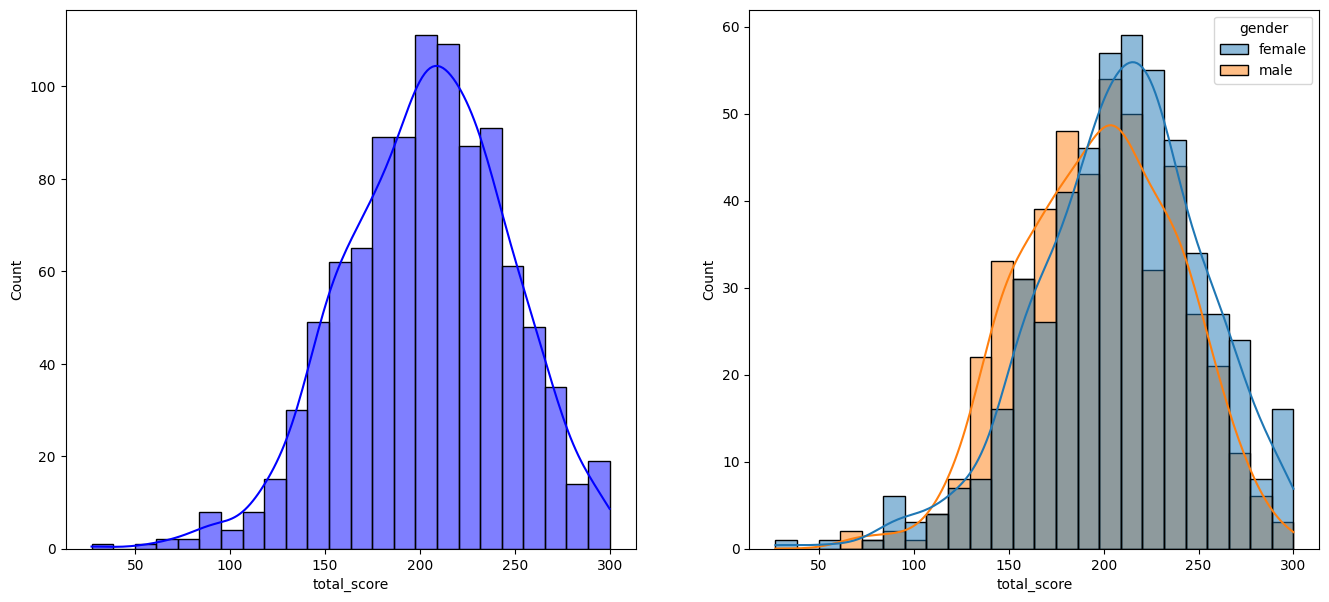

In [48]:
fig,axs=plt.subplots(1,2,figsize=(25,7))
plt.subplot(131)
sns.histplot(data=df,x='total_score',kde=True,color='b')
plt.subplot(132)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

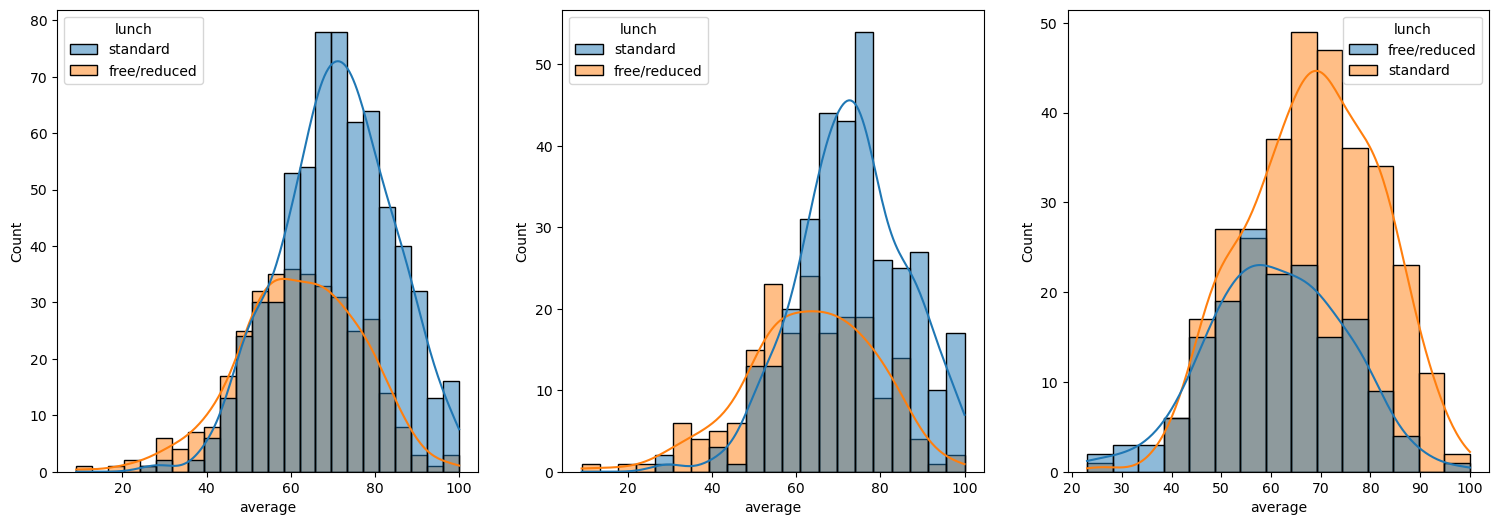

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

1) Standard lunch gives the best result in the exam.
2)  In overall students trend, female students exam did well comapared to male students

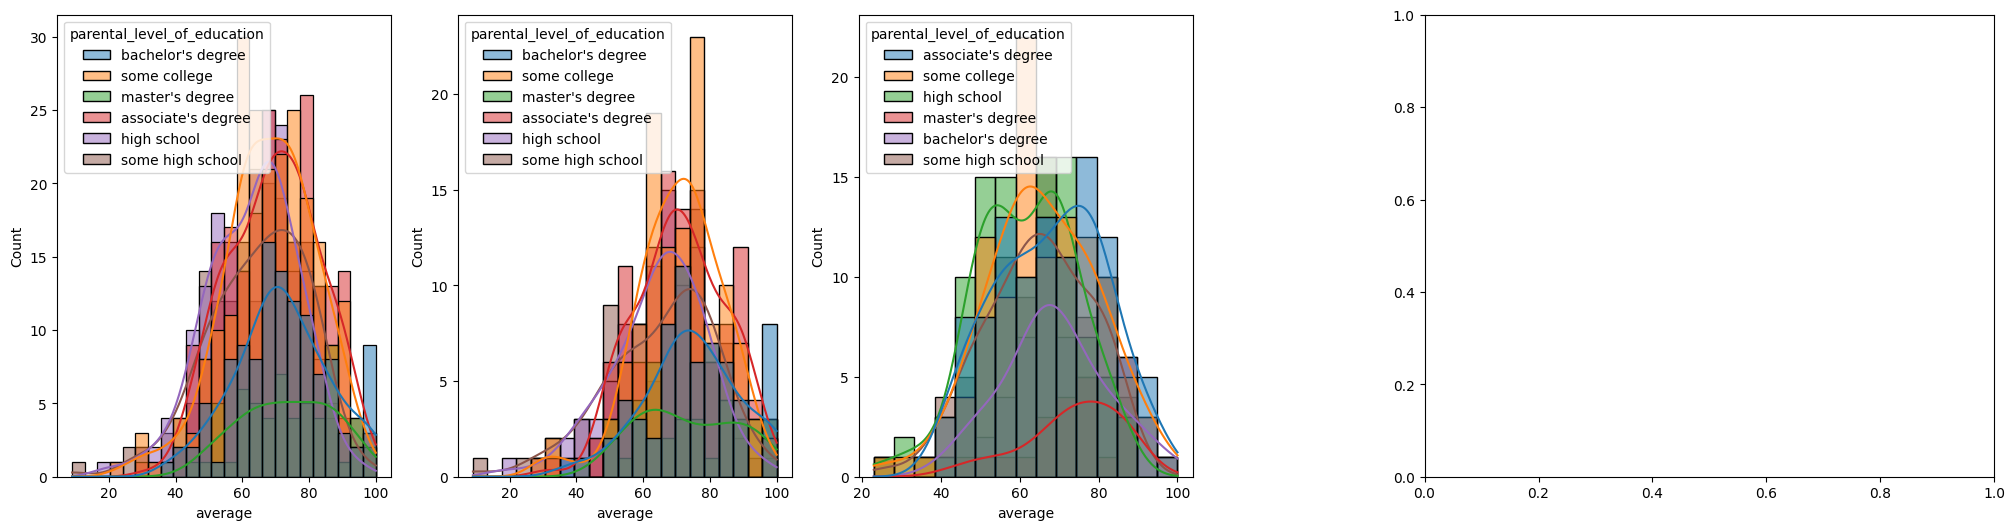

In [49]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(151)
ax=sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(152)
ax=sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(153)
ax=sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

1) In overall master's degree holder parents did well in their children's education but some college parents not well.
2) By segregating the male and female students , In both female and male student's parent's had master degree holder did well compare to others.


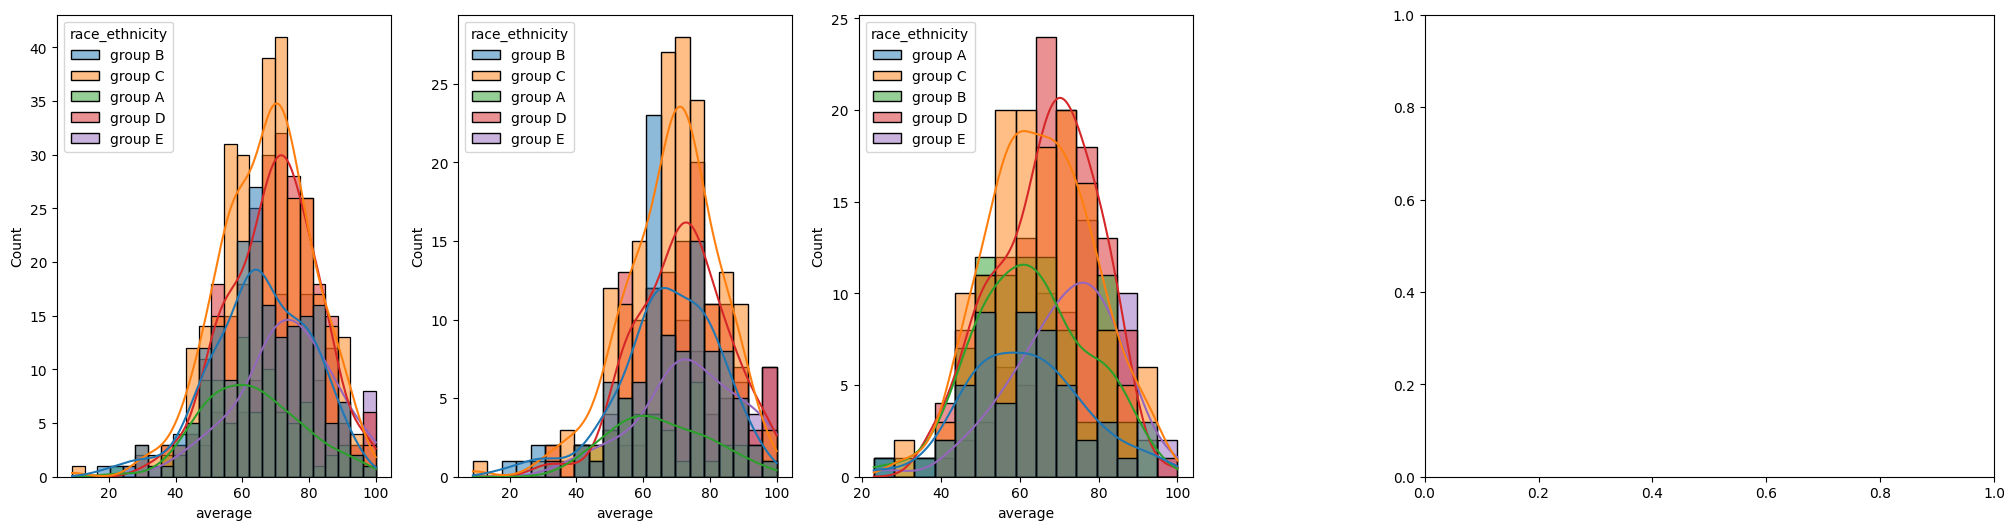

In [50]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(151)
ax=sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(152)
ax=sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(153)
ax=sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

Students comes from group A and group B to perform poorly in exam irrespective of whether they are male or female.

## 4.2 Maximum score by students in all three subjects.

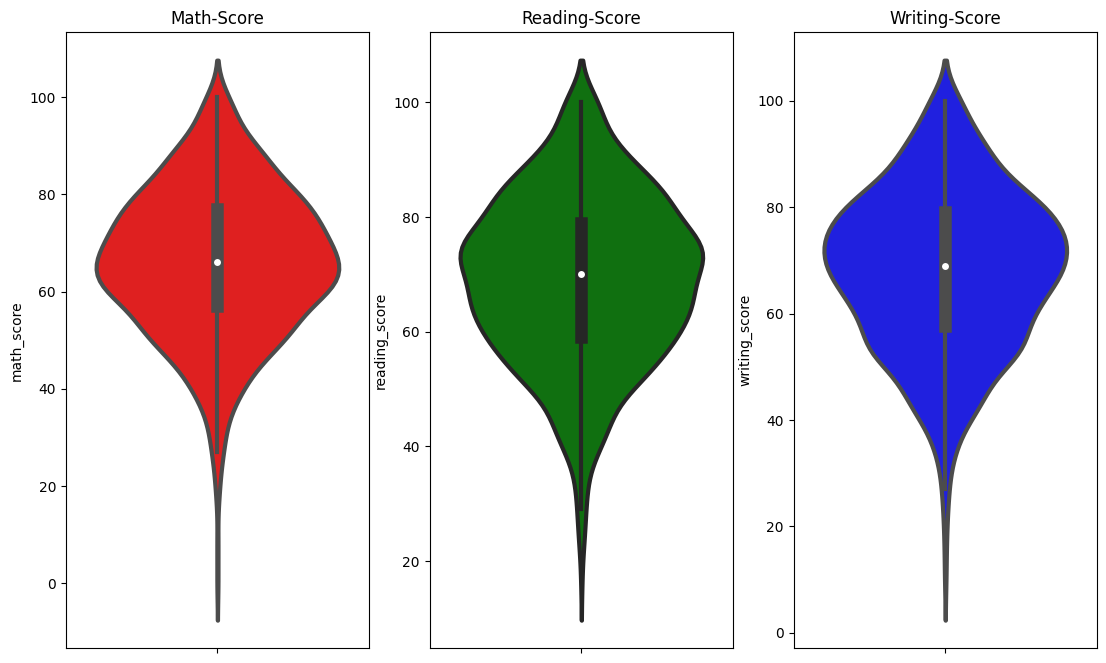

In [51]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title("Math-Score")
sns.violinplot(y='math_score',data=df,color='r',linewidth=3)
plt.subplot(1,4,2)
plt.title("Reading-Score")
sns.violinplot(y='reading_score',data=df,color='g',linewidth=3)
plt.subplot(1,4,3)
plt.title("Writing-Score")
sns.violinplot(y='writing_score',data=df,color='b',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

## 4.3 Multivariate analysis using pieplot

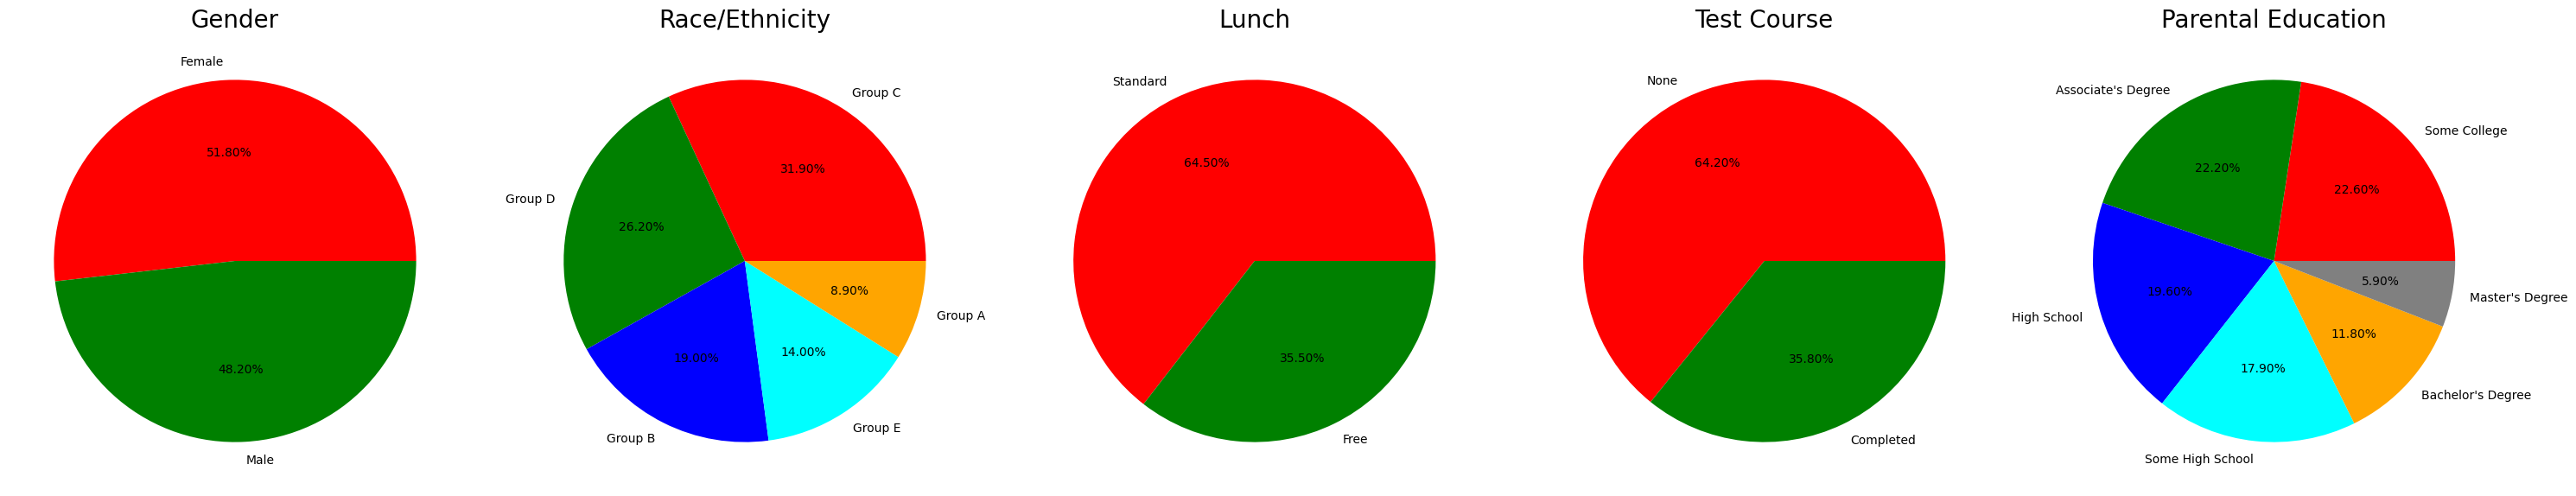

In [53]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='Female','Male'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%1.2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%1.2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%1.2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%1.2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%1.2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

## 4.4 Feature wise visualization

Gender column
1) How is the distribution of gender?
2) Is gender has any impact on student's performance?


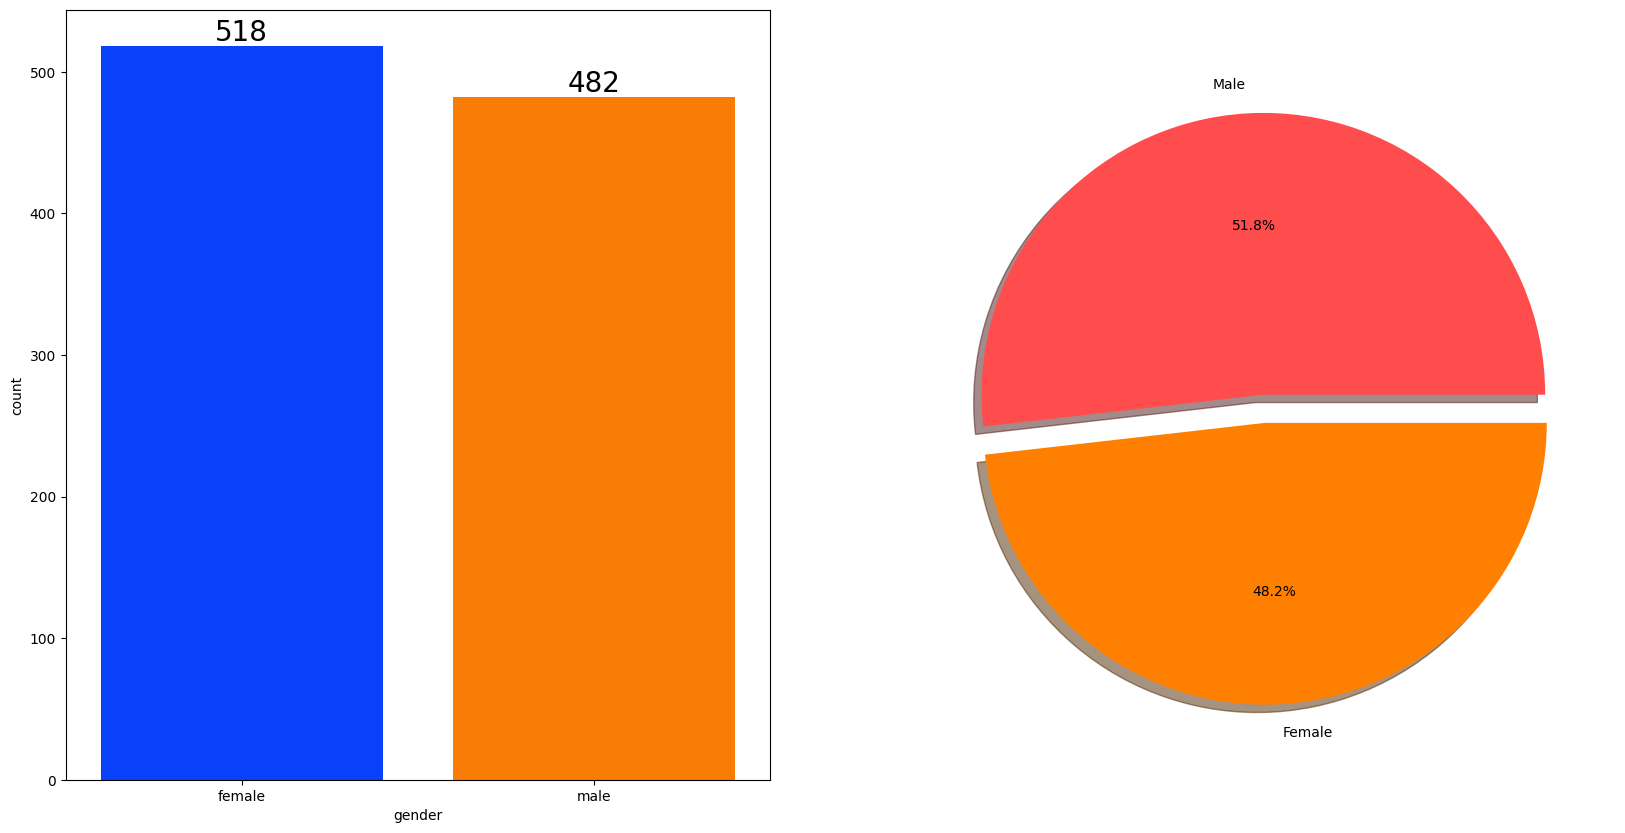

In [54]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

In [59]:
gender_group = df.groupby('gender').count()
gender_group

,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
gender,,,,,,,,,
female,518,518,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482,482,482


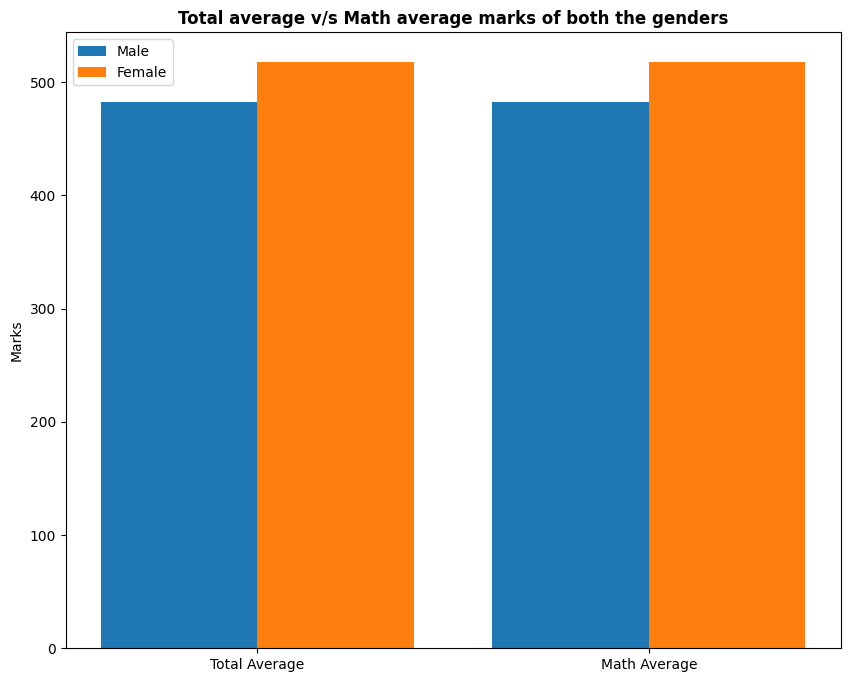

In [60]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

Race/Ethnicity column:
1) How is group wise distribution?
2) Is race/ethnicity has any impact on student's performance?

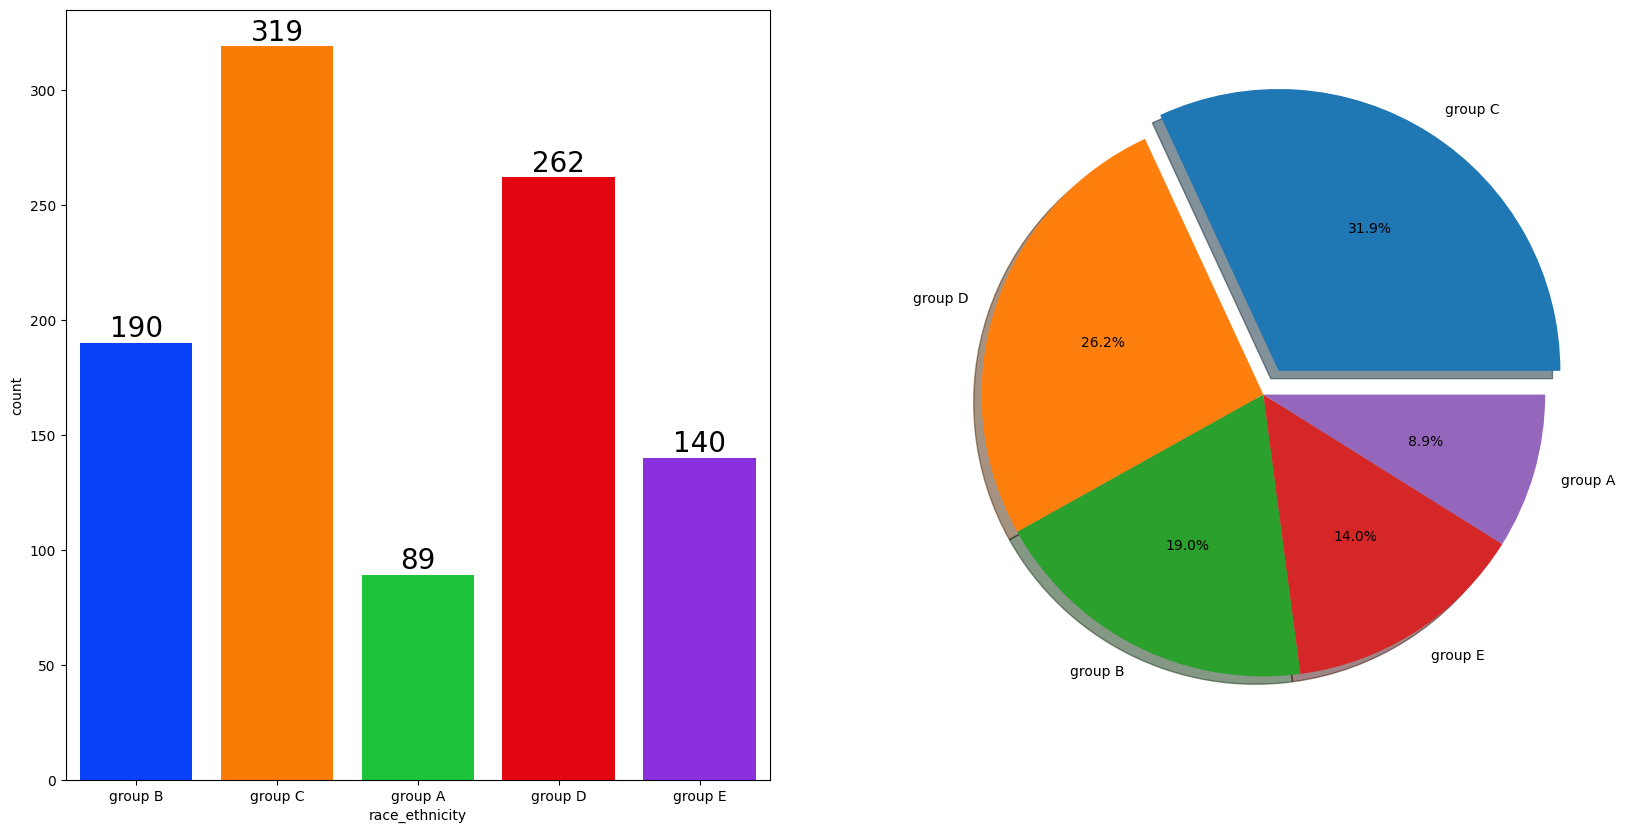

In [61]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

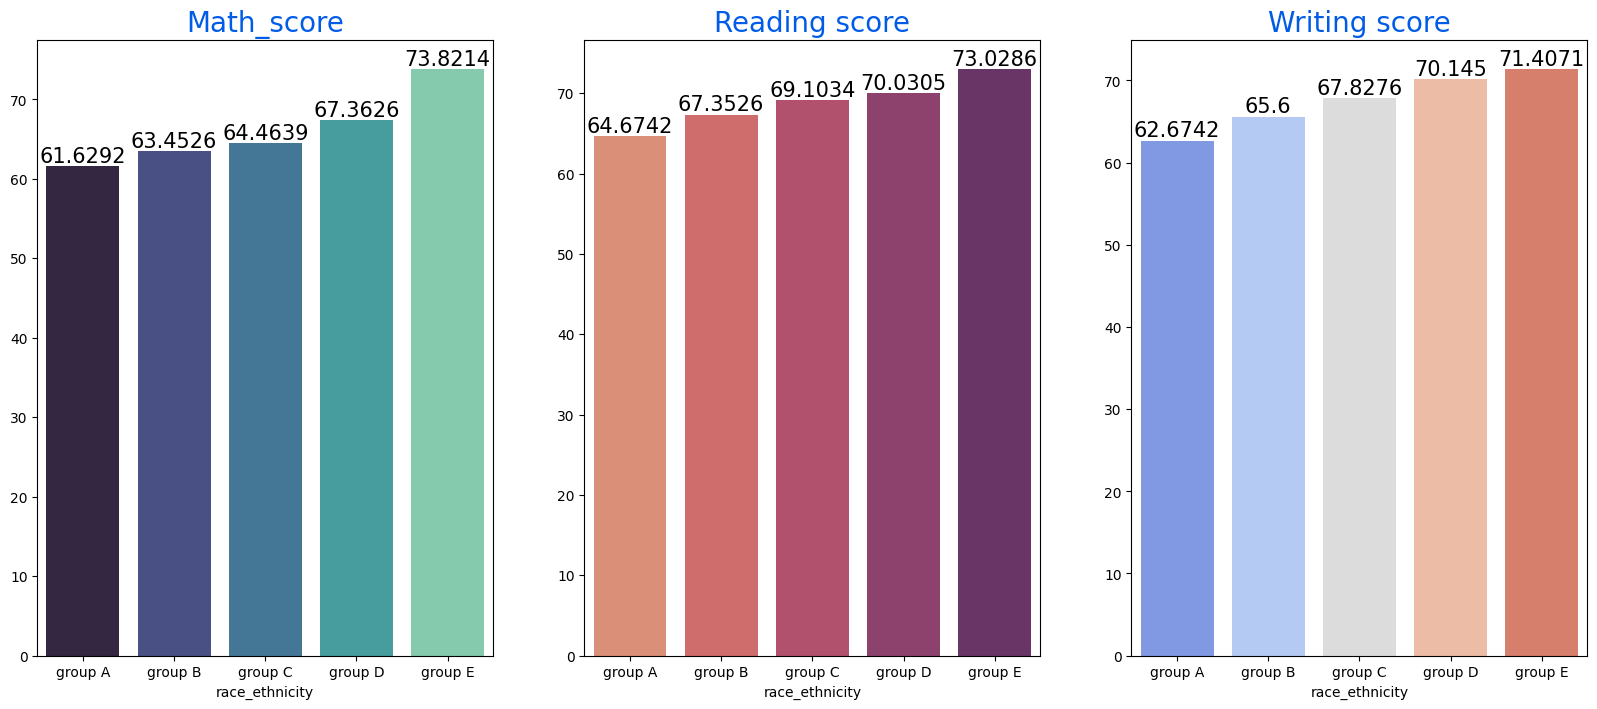

In [62]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math_score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

Parental level of education column:
1) What is educational background of student's parent?
2) Is parental education has any impact on student's performance?


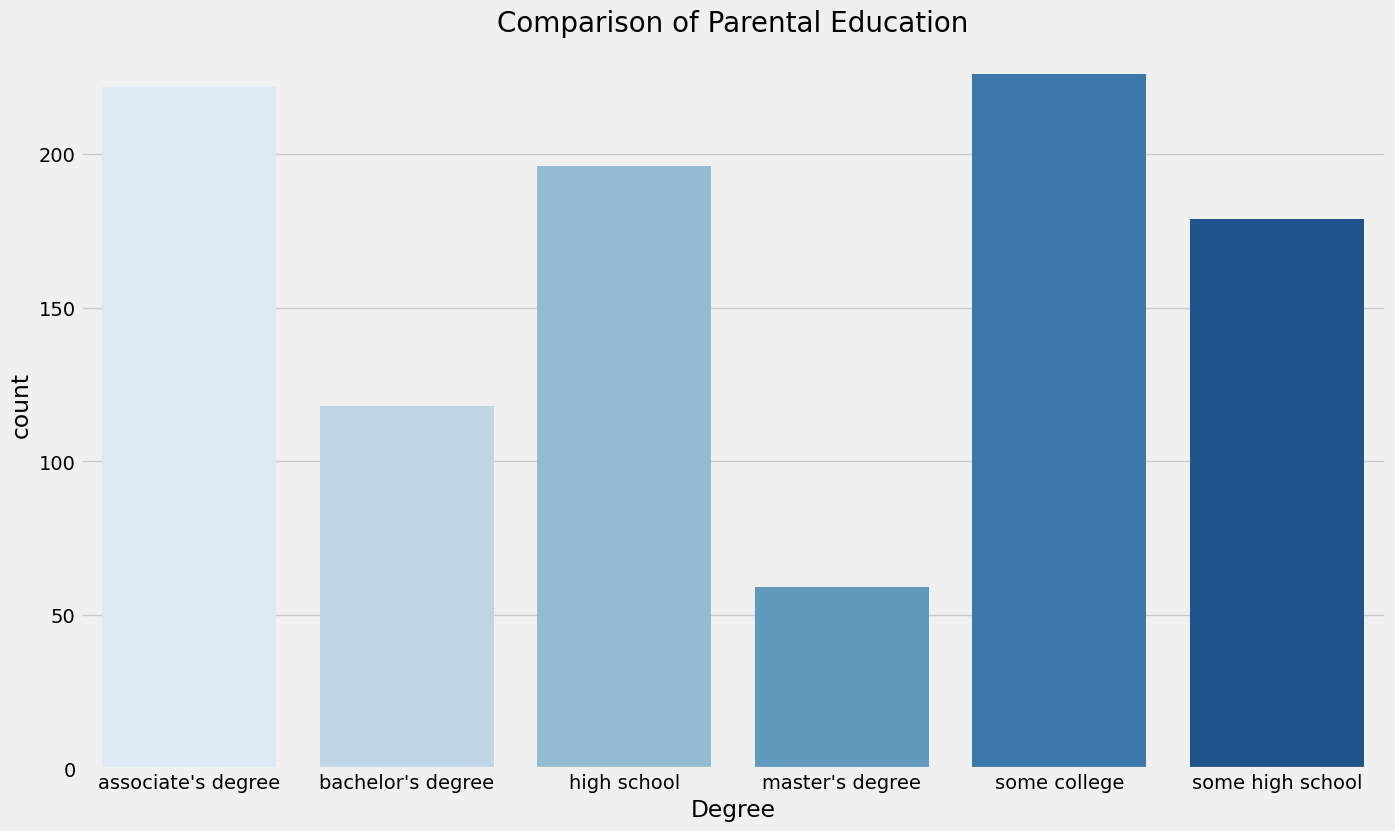

In [63]:
# Convert 'parental level of education' column to categorical data type
df['parental_level_of_education'] = df['parental_level_of_education'].astype('category')

# Set plot size and style
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

# Plotting the countplot
sns.countplot(data=df, x='parental_level_of_education', palette='Blues')

# Set title and labels
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')

plt.show()


#### Insights 
- Largest number of parents are from some college.

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

Lunch column:
1) which type of lunch is most common among student's?
2) What is the effect of lunch type of test results?


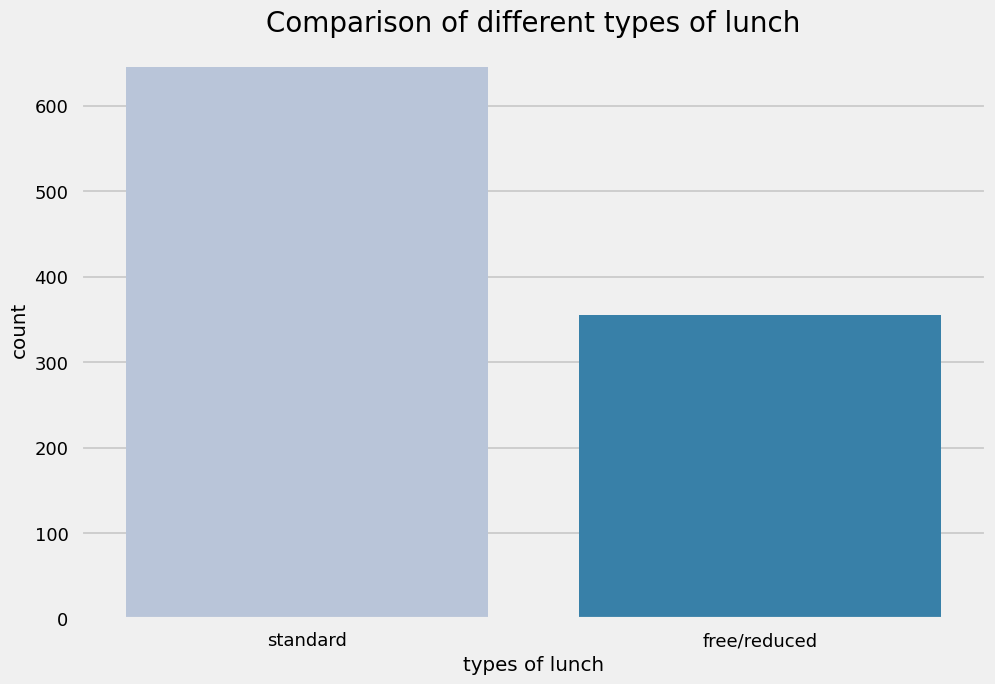

In [65]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')

sns.countplot(data=df, x='lunch', palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight=30, fontsize=20)
plt.xlabel('types of lunch')

plt.show()


#### Insights 
- Students being served Standard lunch was more than free lunch

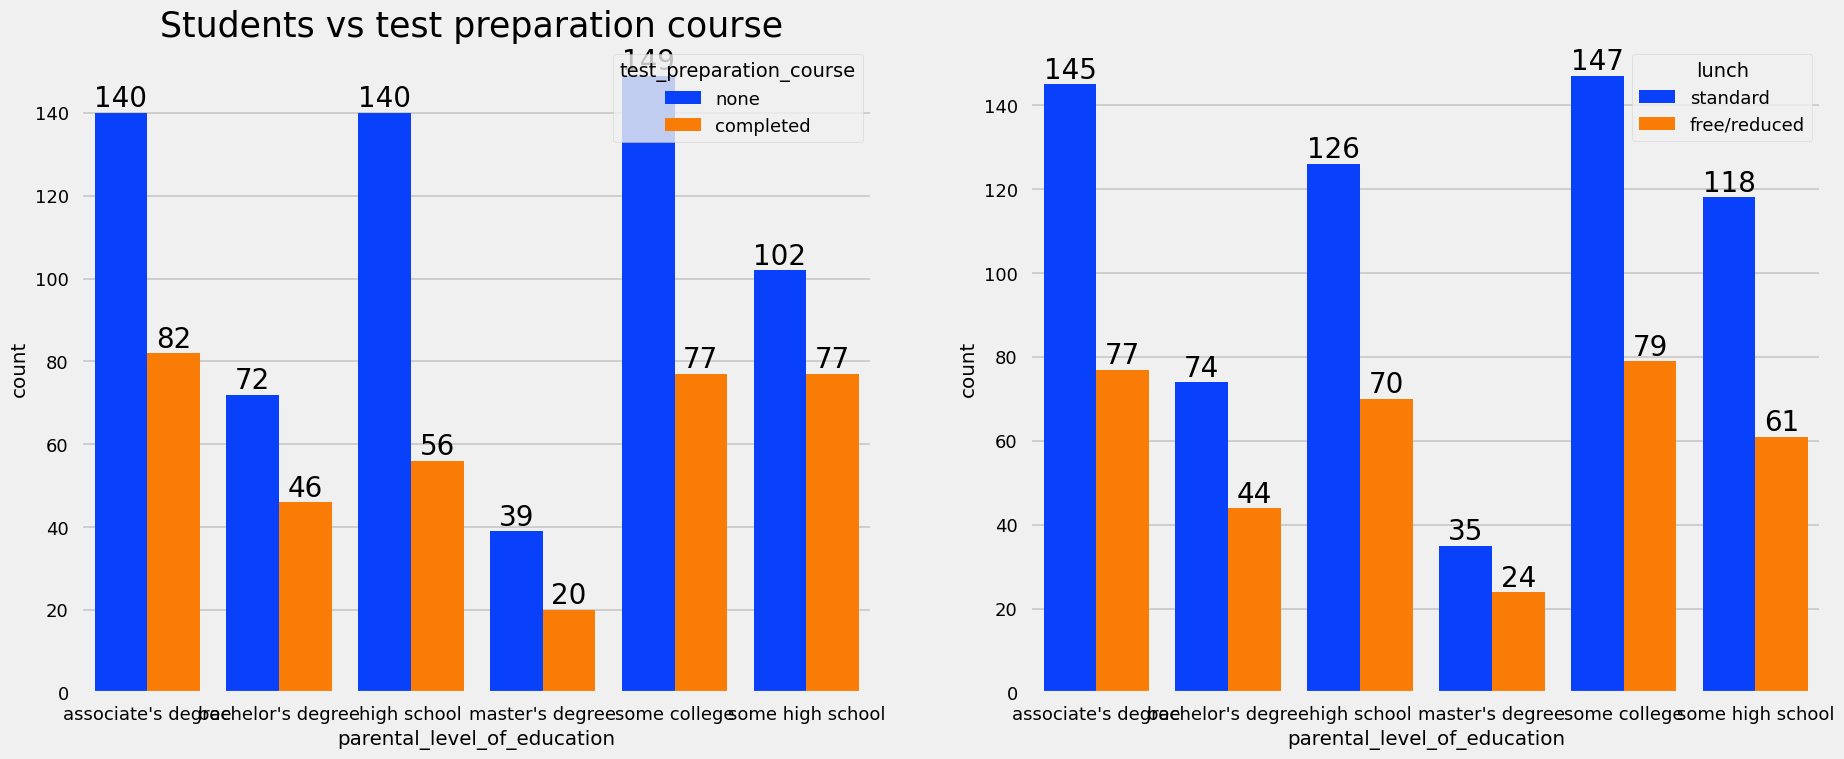

In [66]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

Test Preparation Course Column:
1) which type of lunch is most common among student's?
2) Is the preparation course has any impact on student's performance?

<Axes: xlabel='lunch', ylabel='writing_score'>

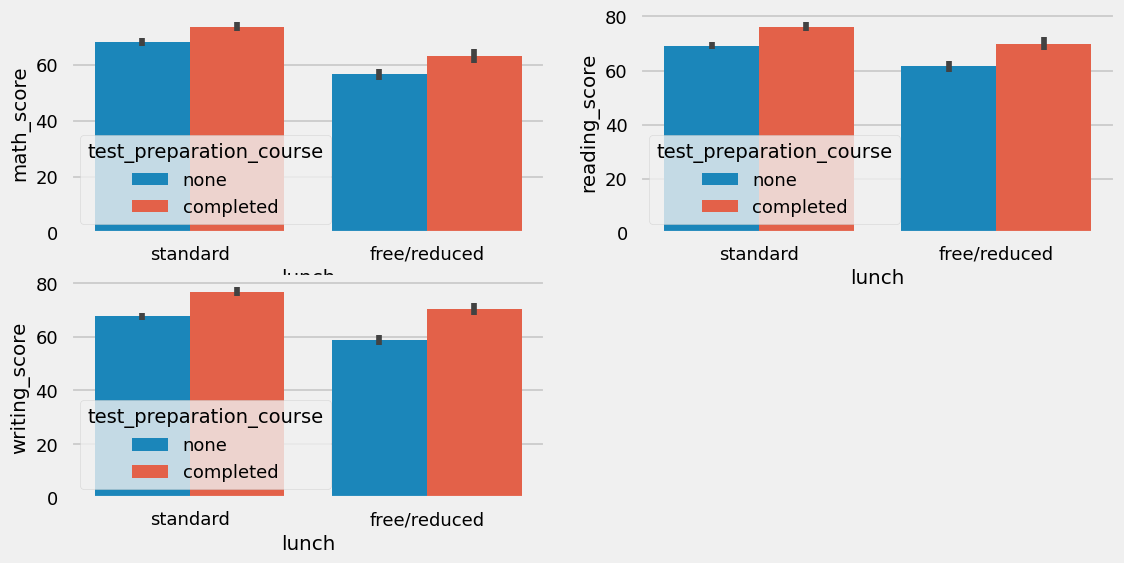

In [68]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

Checking Outliers:

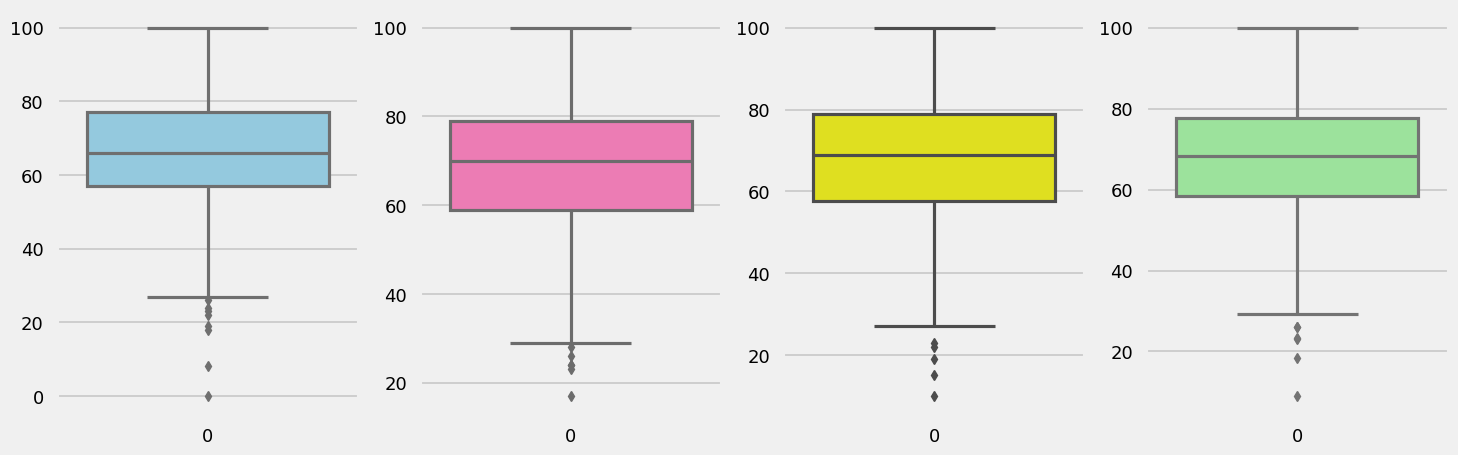

In [69]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

Multivariate Analysis Using Pairplot:

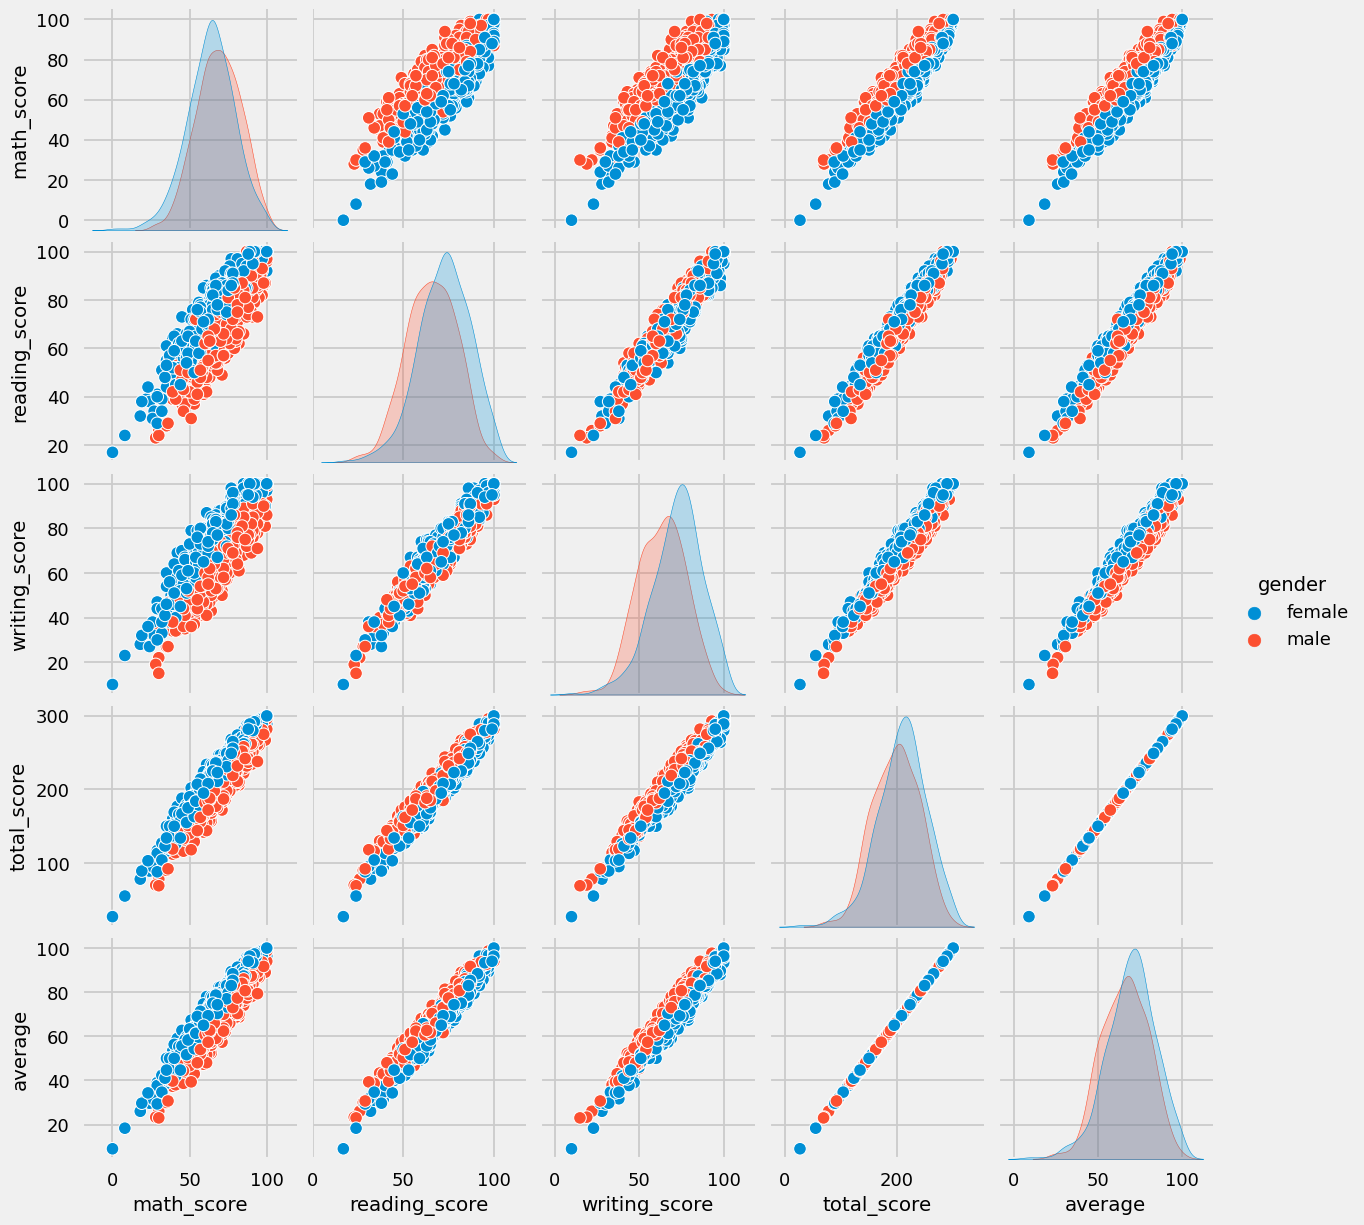

In [70]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

# Conclusions:-

- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.